## Observations and Insights 

In [183]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata= pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [96]:
# Checking the number of mice.
count = merge_df.groupby(["Mouse ID"]).count()
count

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [184]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(merge_df.duplicated(subset=["Mouse ID", "Timepoint"]))


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [185]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"])]
print("Duplicate Rows based on 2 columns are:", duplicate_df, sep='\n')


Duplicate Rows based on 2 columns are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [186]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [187]:
# Checking the number of mice in the clean DataFrame.
mice = clean_data.groupby(["Mouse ID"]).count()
mice.count()


Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [188]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_data.groupby(["Drug Regimen"]).mean()
median = clean_data.groupby(["Drug Regimen"]).median()
variance = clean_data.groupby(["Drug Regimen"]).var()
standard_dev = clean_data.groupby(["Drug Regimen"]).std()
sem = clean_data.groupby(["Drug Regimen"]).sem()


In [189]:
# Assemble the resulting series into a single summary dataframe.
mean["Tumor Volume (mm3)"] 
median["Tumor Volume (mm3)"] 
variance["Tumor Volume (mm3)"] 
standard_dev["Tumor Volume (mm3)"] 
sem["Tumor Volume (mm3)"] 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df =pd.DataFrame({"Mean": mean["Tumor Volume (mm3)"], "Median": median["Tumor Volume (mm3)"], "Variance": variance["Tumor Volume (mm3)"], "Stardard Deviation": standard_dev["Tumor Volume (mm3)"], "SEM": sem["Tumor Volume (mm3)"]})
summary_df

,Mean,Median,Variance,Stardard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

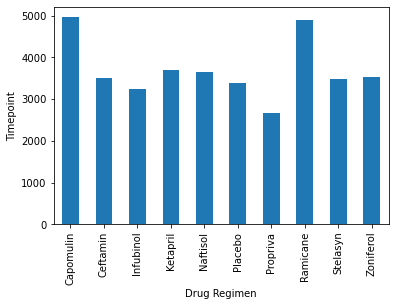

In [190]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoint = clean_data.groupby(["Drug Regimen"])
count_timepoint = total_timepoint["Timepoint"].sum()

count_chart = count_timepoint.plot(kind="bar")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Timepoint")

plt.show()

In [191]:
# Get the names of Drug Regimen.
drug_name = count_timepoint.index.tolist()
drug_name

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

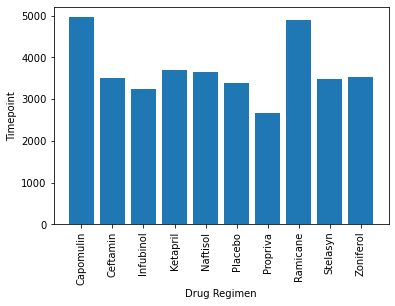

In [178]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = drug_name
x_axis
y_axis = total_timepoint["Timepoint"].sum()
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.xticks(rotation=90)
plt.show()


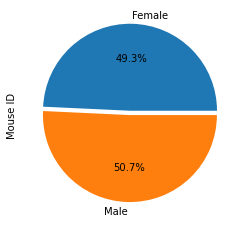

In [207]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_data.groupby(["Sex"])
sex_count = sex["Mouse ID"].count()
explode = (0.05,0)
sex_pie = sex_count.plot(kind="pie", autopct='%1.1f%%', explode=explode)
plt.show()

In [208]:
numbers = clean_data["Sex"].value_counts()
numbers

Male      958
Female    930
Name: Sex, dtype: int64

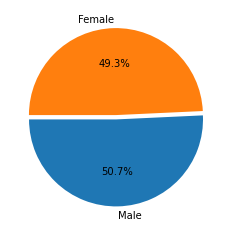

In [210]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "Male", "Female"
explode = (0.05,0)
fig2, ax2 = plt.subplots()
ax2.pie
ax2.pie(numbers, labels = labels, autopct='%1.1f%%', explode=explode, startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [144]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [211]:
# Start by getting the last (greatest) timepoint for each mouse
timepoints = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
timepoints

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [212]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoints = timepoints.reset_index()

max_timepoints_merge = timepoints.merge(clean_data, on = ["Mouse ID", "Timepoint"], how="left") 
max_timepoints_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [213]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

 # Locate the rows which contain mice on each drug and get the tumor volume
for drug in treatment: 
    final_vol = max_timepoints_merge.loc[max_timepoints_merge["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_volume.append(final_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = final_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
print(f"The lower quartile of {drug} is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"IQR is {iqr}")
print(f"The median of tumor volume is {quartiles[0.5]}")
  
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")
    

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
IQR is 15.577752179999997
The median of tumor volume is 59.85195552
Values below 25.355449580000002 could be outliers
Values above 87.66645829999999 could be outliers


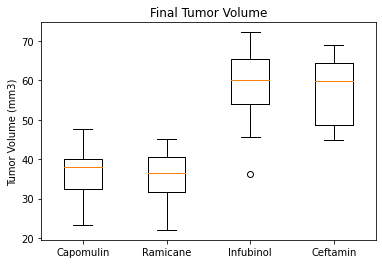

In [214]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume")
ax1.set_ylabel("Tumor Volume (mm3)")

ax1.boxplot(tumor_volume, labels = treatment)
plt.show()


## Line and Scatter Plots

In [215]:
line = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

line1 = line[line["Mouse ID"] == "s185"]
line1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


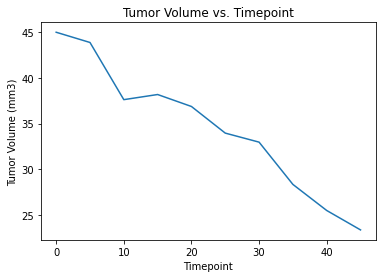

In [216]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Drug Regimen

x_axis = line1["Timepoint"]
y_axis = line1["Tumor Volume (mm3)"]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timepoint")
plt.plot(x_axis, y_axis)
plt.show()

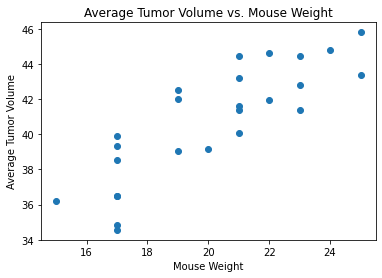

In [217]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tum_vol = line.groupby(["Mouse ID"]).mean()
ave_tum_vol = tum_vol["Tumor Volume (mm3)"]
weight = tum_vol["Weight (g)"]
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.scatter(weight, ave_tum_vol)
plt.show()

## Correlation and Regression

In [218]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
coefficient = round(st.pearsonr(weight, ave_tum_vol)[0], 2)
coefficient
print(f"The correlation coefficient for mouse weight and average tumor volume for theCapomulin regimen is {coefficient}")

The correlation coefficient for mouse weight and average tumor volume for theCapomulin regimen is 0.84


In [219]:
#Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, ave_tum_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'